# MODULENDPRÜFUNG STATISTICS FOR DATA SCIENCE HS18

## Aufgabe 1: Elektrische Widerstände (22 Punkte)

Zwei verschiedene Messmethoden für elektrische Widerstände sollen miteinander verglichen
werden. Aus diesem Grund wurden an 30 Widerständen Parallelmessungen vorgenommen,
die in der Datei `widerstaende.txt` im Verzeichnis `Austausch` enthalten sind. In der ersten Spalte befinden sich die Messwerte nach der Methode *A*, in der zweiten Spalte befinden
sich die Messwerte nach der Methode *B* - die Einheit ist Ohm. Wir möchten überprüfen, ob
die beiden Methoden gleichwertig sind.

---
a) (2 Punkte) Handelt es sich um einen gepaarten oder einen ungepaarten Test?

Es handelt sich um gepaarte Stichproben, da es sich bei den beiden Messwerten um den gleichen Widerstand handelt.

---
b) (3 Punkte) Geben Sie die Null- und die Alternativhypothese an.

$$H_0: \mu_A = \mu_B$$

$$H_A: \mu_A \neq \mu_B$$

Wir behaupten die beiden Messmethoden geben statistisch signifikant Identische Messergebnise.

---
c) (4 Punkte) Geben Sie eine Schätzung für den Mittelwert $\mu$ und die Varianz $σ^2$ der Differenzen an.

In [1]:
import pandas as pd
import numpy as np

resistors = pd.read_csv('widerstaende.txt', sep=' ')

In [2]:
resistors.head()

,Methode A,Methode B
0,98.574391,99.794713
1,101.207987,99.032684
2,98.017907,99.696307
3,99.360374,100.840861
4,100.301177,100.174309


In [3]:
resistor_diff = resistors["Methode A"] - resistors["Methode B"]

In [4]:
resistor_diff.head()

0   -1.220322
1    2.175303
2   -1.678400
3   -1.480487
4    0.126868
dtype: float64

In [5]:
mean, var = resistor_diff.mean(), resistor_diff.var()
mean, var

(-0.9502568696222127, 1.8898564410608352)

In [6]:
resistor_diff.describe()

count    30.000000
mean     -0.950257
std       1.374720
min      -3.703859
25%      -1.468907
50%      -0.996938
75%      -0.334442
max       2.220090
dtype: float64

---
d) (9 Punkte) Führen Sie den geeigneten t-Test durch: Geben Sie die Teststatistik und deren
Verteilung unter der Nullhypothese an, bestimmen Sie den (realisierten) Wert der Teststatistik $T$, den Verwerfungsbereich für $T$ und den Testentscheid. Überprüfen Sie, ob ein
t-Test angebracht ist. Welche weiteren statistischen Tests kämen in Frage, falls die Bedingungen für die Anwendung eines t−Tests nicht erfüllt sind? (Wenn Sie obige Aufgabe
nicht lösen konnten, benutzen Sie im folgenden als Ersatzwert $σ^2 = 2.5$.)

In [7]:
resistor_diff.plot()

Fuer den folgenden t-Test wird das Signifikanzniveau $\alpha = 0.05$ verwendet.

In [8]:
import scipy.stats as st

n = resistor_diff.size

st.t.interval(0.95, loc=mean, scale=var/np.sqrt(n), df=(n - 1))

(-1.655940862306151, -0.24457287693827445)

Das Vertrauensintervall ist $[-1.46, -0.44]$ somit ist der zweiseitige Verwerfungsbereich $(-\infty, -1.46]$ und $[-0.44, \infty)$

In [9]:
st.ttest_rel(resistors["Methode A"], resistors["Methode B"])

Ttest_relResult(statistic=-3.7860577810321954, pvalue=0.0007128629380377862)

Da der p-Wert mit 0.00071 weit unter dem Signifikanzniveau ist, wird die Nullhypothese deutlich verworfen. Das Heisst die beiden Messmethoden ergeben, Statistisch signifikant nicht das gleiche

Um einen Aussagekraeftigen t-Test durchfuehren zu koennen, muss eine Normalverteilung angenommen werden. Da wir hier nicht von einer Normalverteilung ausgehen koennen, waehre ein Wolcoxon- oder Vorzeichentest angebracht. Jedoch kommt auch dieser zum gleichen Testresultat.

In [10]:
st.wilcoxon(resistors["Methode A"], resistors["Methode B"], correction=True)

WilcoxonResult(statistic=67.0, pvalue=0.0006893605573928746)

Die Teststatistik:

$$T(X) = \frac{\bar{X} - \mu}{\hat{\sigma}/\sqrt{n}}$$

In [17]:
mu = resistors["Methode A"].mean() - resistors["Methode B"].mean()
# WRONG: var = resistors["Methode A"].var() - resistors["Methode B"].var()

mu_2 = (resistors["Methode A"] - resistors["Methode B"]).mean()
var_2 = (resistors["Methode A"] - resistors["Methode B"]).var()

mu, mu_2, var_2

(-0.9502568696222227, -0.9502568696222127, 1.8898564410608352)

---
e) (4 Punkte) Bestimmen Sie ein zweiseitiges 95%-Vertrauensintervall für $µ_D$, erklären Sie die
Bedeutung dieses Intervalls, und fällen Sie den Testentscheid aus Teilaufgabe (d) mit Hilfe
des von Ihnen ermittelten Vertrauensintervalls.

In [12]:
st.t.interval(0.95, loc=mean, scale=var/np.sqrt(n), df=(n - 1))

(-1.655940862306151, -0.24457287693827445)

## Aufgabe 2: Stochastischer Prozess (17 Punkte)

Betrachten Sie den stochastischen Prozess, der gegeben ist durch

$$X(t) = A \cdot cos(\pi t)$$

wobei $A$ eine Exponential-verteilte Zufallsvariable ist, also $A ∼ \text{Exp}(λ)$.

---
(a) (4 Punkte) Zum Zeitpunkt $t_0 = \frac{1}{3}$ wurde über sehr viele Realisierungen von X(t) der
empirische Scharmittelwert $\bar{x}(t = t_0) = 0.1$ ermittelt. Schätzen Sie $λ$.

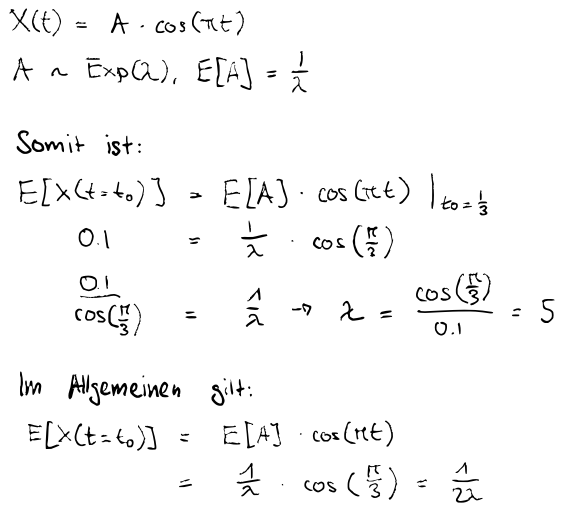

---
(b) (4 Punkte) Wie gross ist die Wahrscheinlichkeit $P[X(t = t_0) > 0.5]$? Benützen Sie dazu
die Schätzung $b_λ$ aus Teilaufgabe (a) (Wenn Sie obige Aufgabe nicht gelöst haben, rechnen Sie mit $b_λ = 1$).

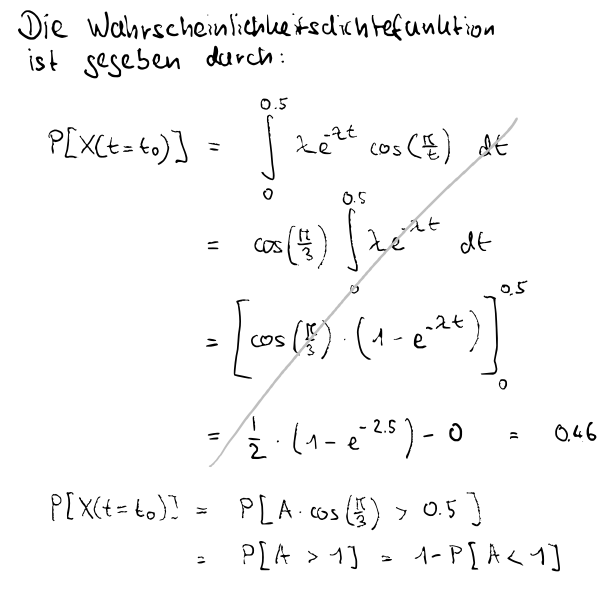

In [13]:
import scipy.stats as st

1 - st.expon.cdf(1, scale=1/5)

0.006737946999085476

---
(c) (4 Punkte) Berechnen Sie den Erwartungswert $µ_X(t) = E[X(t)]$ zu einem beliebigen
Zeitpunkt t.

$$E[X(t)] = E[A] \cdot \cos(\pi t) = \frac{\cos(\pi t)}{\lambda}$$

---
(d) (4 Punkte) Wie gross ist die Varianz $\text{Var}[X(t)]$ zu einem beliebigen Zeitpunkt $t$?

http://modulname-generator.surge.sh/austritt.pdf

---
(e) (1 Punkt) Handelt es sich bei $X(t)$ um einen stationären stochastischen Prozess?

Da der scharmittelwert von der Zeit 't' abhaengt, ist der stochastische Prozess nicht stationaer.

## Aufgabe 4: Multiple Choice (27 Punkte)

*Es ist bei den folgenden Multiple-Choice-Aufgaben jeweils genau eine Antwort richtig. Kreuzen Sie
also nur eine Antwort an. Eine korrekte Antwort gibt 3 Pluspunkte und eine falsche Antwort einen
Minuspunkt. Minimal erhalten Sie null Punkte für Aufgabe 4.*

1) Sie haben eine Messreihe mit 20 Datenpunkten für den elektrischen Strom durch einen
Kupferdraht. Der empirische Mittelwert ergab I = 15.02 A und für die empirische Standardabweichung fand man $s_I = 0.2203 A$. Wie gross ist der relative Fehler?

- a) 0.003 %
- b) 4.9 %
- c) 0.05 %
- d) 0.3 %
- e) 0.05 A

Antwort: c

2) Es sei $X ∼ N(µ, σ^2)$ verteilt mit $µ = 3$ und $σ^2 = 5$. Dann gilt

- a) $Y = 2X ∼ N(6, 10)$
- b) $Y = 2X ∼ N(3, 5)$
- c) $Y = 2X ∼ N(6, 20)$
- d) $Y = 2X ∼ N(3, 50)$
- e) keine der obigen Aussagen ist korrekt

Antwort: ~~a~~ c

3) Wird ein neuer Intelligenztest entwickelt, so muss er zuerst normiert werden. Dazu führen
Psychologen den Test mit einer repräsentativen Gruppe aus der Bevölkerung durch. Die
Psychologen ermitteln dann, wie viele Testaufgaben durchschnittlich gelöst wurden. Diesen
Mittelwert definieren sie als IQ mit dem Wert $100$. Als nächstes wird die Verteilung des
IQ’s so standardisiert, dass genau $34.1$ Prozent der Getesteten einen IQ von über $115$ haben.
Die so resultierende Verteilung X des IQ’s ist in guter Näherung $N (µ, σ^2)$ verteilt mit
$µ = 100$. Wie gross ist $σ$?

- a) 32.1 
- b) 36.6 
- c) 30.2 
- d) 37.9

Antwort: b

In [20]:
import scipy.stats as st

print(f"P(X = 115) = {(1 - st.norm(100, 32.1).cdf(115))}")
print(f"P(X = 115) = {(1 - st.norm(100, 36.6).cdf(115))}")
print(f"P(X = 115) = {(1 - st.norm(100, 30.2).cdf(115))}")
print(f"P(X = 115) = {(1 - st.norm(100, 37.9).cdf(115))}")

P(X = 115) = 0.3201463052957503
P(X = 115) = 0.3409631039341816
P(X = 115) = 0.3097042814025265
P(X = 115) = 0.3461342696217915


4) Im Verzeichnis Austausch befindet sich die Datei $rainDay.txt$. Lesen Sie die Datei als
Zeitreihe ein. Zeichnen Sie die Daten als Boxplots auf, wobei Sie als Gruppierungsvariable
den Wochentag, Monat und das Quartal verwenden sollen. Welche Aussage ist korrekt?

- a) Am Mittwoch regnet es am stärksten.
- b) Im ersten Quartal hat es am wenigsten Regen.
- c) Von Mai bis September hat es am wenigsten Regen.
- d) Im Dezember hat es am wenigsten Regen.

Antwort: c

In [137]:
import pandas as pd

rain = pd.read_csv("rainDay.txt", sep=" ", parse_dates=True, index_col=1, header=None)
print(rain.head())

rain = pd.DataFrame({
    'amount': rain[2]
}, index=rain.index)
rain.head()

                0      2
1                       
2000-01-01  12784   0.00
2000-02-01  12785  12.90
2000-03-01  12786   0.00
2000-04-01  12787   0.05
2000-05-01  12788   3.55


,amount
1,
2000-01-01,0.00
2000-02-01,12.90
2000-03-01,0.00
2000-04-01,0.05
2000-05-01,3.55


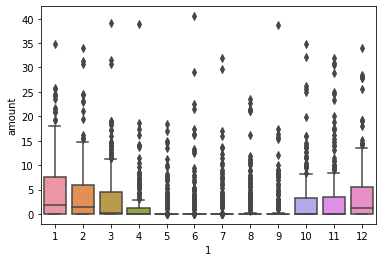

In [132]:
import seaborn as sns

sns.boxplot(rain.index.month, rain["amount"])

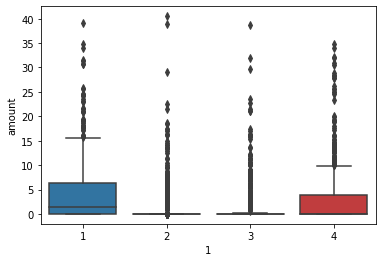

In [133]:
sns.boxplot(rain.index.quarter, rain["amount"])

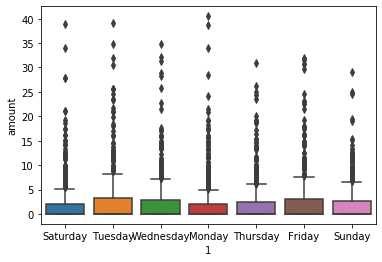

In [134]:
sns.boxplot(rain.index.weekday_name, rain["amount"])

5) Im Verzeichnis Austausch befindet sich die Datei `rainDay.txt`. Lesen Sie die Datei als
Zeitreihe ein. Zeichnen Sie die täglichen Regenfälle auf, und zerlegen Sie die Zeitreihe in
Trend, saisonale Effekt und Restterm. Welche der folgenden Aussagen ist korrekt?

- a) Es gibt einen steigenden Trend.
- b) Der saisonale Effekt ist approximativ konstant.
- c) Der Restterm bei einem additiven Modell zeigt keine saisonalen Effekte auf.
- d) Ein multiplikatives Modell wäre eher angebracht.
- e) Keine der obigen Aussagen ist korrekt.

Antwort: b

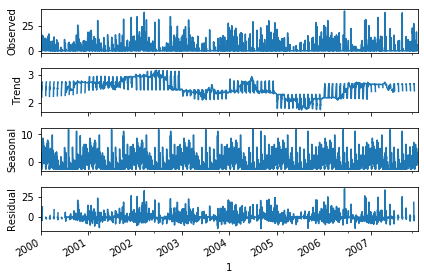

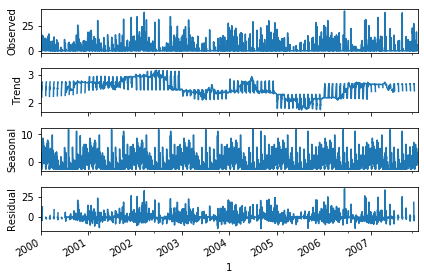

In [135]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_rain = seasonal_decompose(rain, freq=365)
decompose_rain.plot()

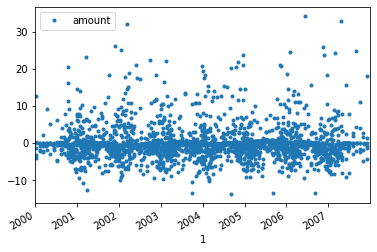

In [138]:
decompose_rain.resid.plot(style=".")

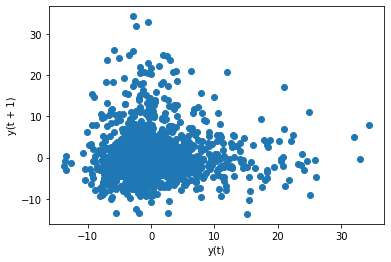

In [139]:
from pandas.plotting import lag_plot
lag_plot(decompose_rain.resid,1)

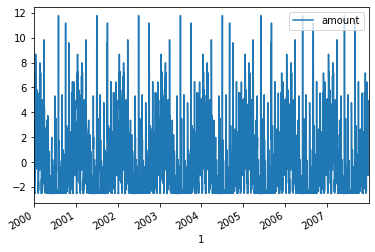

In [140]:
decompose_rain.seasonal.plot()

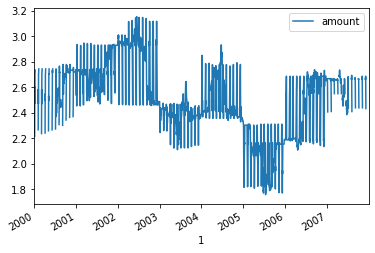

In [141]:
decompose_rain.trend.plot()

6) Im Verzeichnis Austausch befindet sich die Datei `rainDay.txt`. Lesen Sie die Datei
als Zeitreihe ein. Plotten Sie die relativen täglichen Zuwächse des Regenfalls. Welche der
folgenden Aussagen ist korrekt?

- a) Es gibt einen steigenden Trend.
- b) Es gibt einen fallenden Trend.
- c) Es scheint einen Zusammenhang zu geben, so dass aus dem Vortag der Regenfall des Folgetages bestimmt werden kann.
- d) Es scheint keinen Zusammenhang zu geben, so dass aus dem Vortag der Regenfall des Folgetages nicht bestimmt werden kann.
- e) Keine der obigen Aussagen ist korrekt.

Antwort: d

In [101]:
from statsmodels.graphics.tsaplots import plot_acf

normal_rain = pd.DataFrame({"rain": rain[2]}, index=rain.index)
normal_rain

,rain
1,
2000-01-01,0.00
2000-02-01,12.90
2000-03-01,0.00
2000-04-01,0.05
2000-05-01,3.55
...,...
2007-12-27,0.00
2007-12-28,0.05
2007-12-29,0.00


In [109]:
pd.DataFrame({
    'day': normal_rain["rain"],
    'day+1': normal_rain["rain"].shift(1),
    'day+2': normal_rain["rain"].shift(2)
}, index=normal_rain.index).corr()

,day,day+1,day+2
day,1.000000,0.237127,0.207614
day+1,0.237127,1.000000,0.237201
day+2,0.207614,0.237201,1.000000


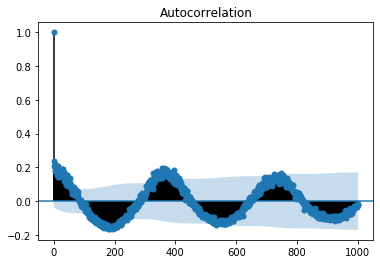

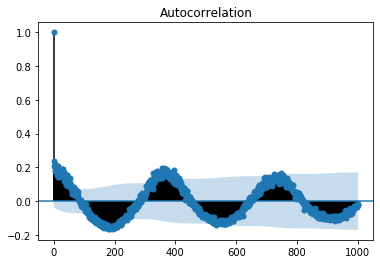

In [104]:
plot_acf(normal_rain, lags=1000)

7) Angenommen, die Korrelation zwischen Einkommen und Weinkenntnisse ist 0.99. Wenn
wir eine Person mit Weinkenntnissen kennenlernen, ist ihr Einkommen wahrscheinlich...

- a) klein
- b) gross
- c) Keine Aussage möglich

Antwort: b

8) Angenommen, es stellt sich heraus, dass Personen mit grossem Einkommen auch grosse
Weinkenntnisse haben, wenn die Korrelation der beiden Variablen gross ist. Sollte man
also einen Kurs über Wein besuchen, um sein Einkommen zu verbessern?

- a) Ja, denn die grosse Korrelation beweist, dass grosse Weinkenntnisse ein grosses Einkommen verursachen.
- b) Es ist keine Aussage möglich. Die Weinkenntnisse könnten die Ursache für ein grosses Einkommen sein, aber das kann man mit der Korrelation nicht zweifelsfrei beantworten.
- c) Nein, denn die grosse Korrelation beweist, dass es keinen kausalen Zusammenhang zwischen grossen Weinkenntnissen und grossem Einkommen geben kann.

Antwort: b

9) Betrachten Sie die Zahlen $1, 3, 4, 5, 6, 10, 23, 46$ Was ist das 20%-Quantil $(q_{0.2})$ dieser Zahlen

- a) $q_{0.2} = 3$
- b) $q_{0.2} = 12.25$
- c) $q_{0.2} = 5.5$
- d) $q_{0.2} = 1$

Antwort: a

In [126]:
pd.DataFrame([1,3,4,5,6,10,23,46]).quantile(0.2, interpolation='nearest')

0    3
Name: 0.2, dtype: int64